# Detección de fraudes

## Introducción

Una compañía del sector financiero empezó a recibir una gran cantidad de quejas de algunos de sus clientes debido a que la entidad les estaba bloqueando sus tarjetas de crédito al catalogarlas como transacciones fraudulentas. Esta situación
estaba generando una masiva cancelación del servicio debido al voz a voz. Por esta razón la compañía quiere desarrollar un modelo analítico para mejorar dichas
estimaciones sobre transacciones fraudulentas y solicita apoyo al área de Inteligencia Artificial & Data Science (AI & DS).


La base de datos proporcionada contiene 270.566 transacciones y 31 variables, entre ellas:

$Class$: variable objetivo (1 = transacción fraudulenta, 0 = no fraudulenta).

$Amount$: monto de la transacción.

$Time$: tiempo transcurrido.

$V1$ a $V28$: otras variables de interes.

## Análisis Exploratorio de Datos

El conjunto creditcard_train.csv no presenta valores nulos, ni duplicados.
La variable $Amount$ muestra presencia de valores atípicos, aunque estos se consideran información válida.

Cabe señalar que existe un alto desbalance de clases, dado que las transacciones fraudulentas son 467 (correspondiente al 0.1726%) vs. las transacciones no fraudulentas que son 270.099 (correspondiente al 99,83%).

Esto implica que un modelo afectado que prediga siempre “no fraude” obtendría una exactitud superior al 99%. Por tanto, el enfoque se centra en métricas sensibles al desbalance, como Precision, Recall, F1 y especialmente el Área bajo la curva Precision–Recall (AUPRC).

Figura 1. Distribución de clases (fraudes vs. no fraudes).

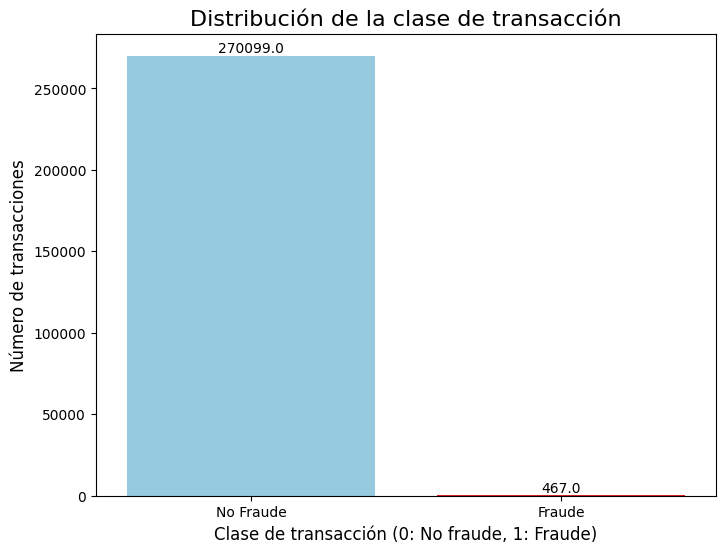

En la Figura 2, se muestra la distribución de todas las variables del conjunto de datos según el tipo de transacción. Se observa que en algunas variables las clases se podrían diferencias como en las variables $V10$, $V12$, $V14$, $V16$ y $V17$.

Figura 2. Distribución de las variables por tipo de transacción.

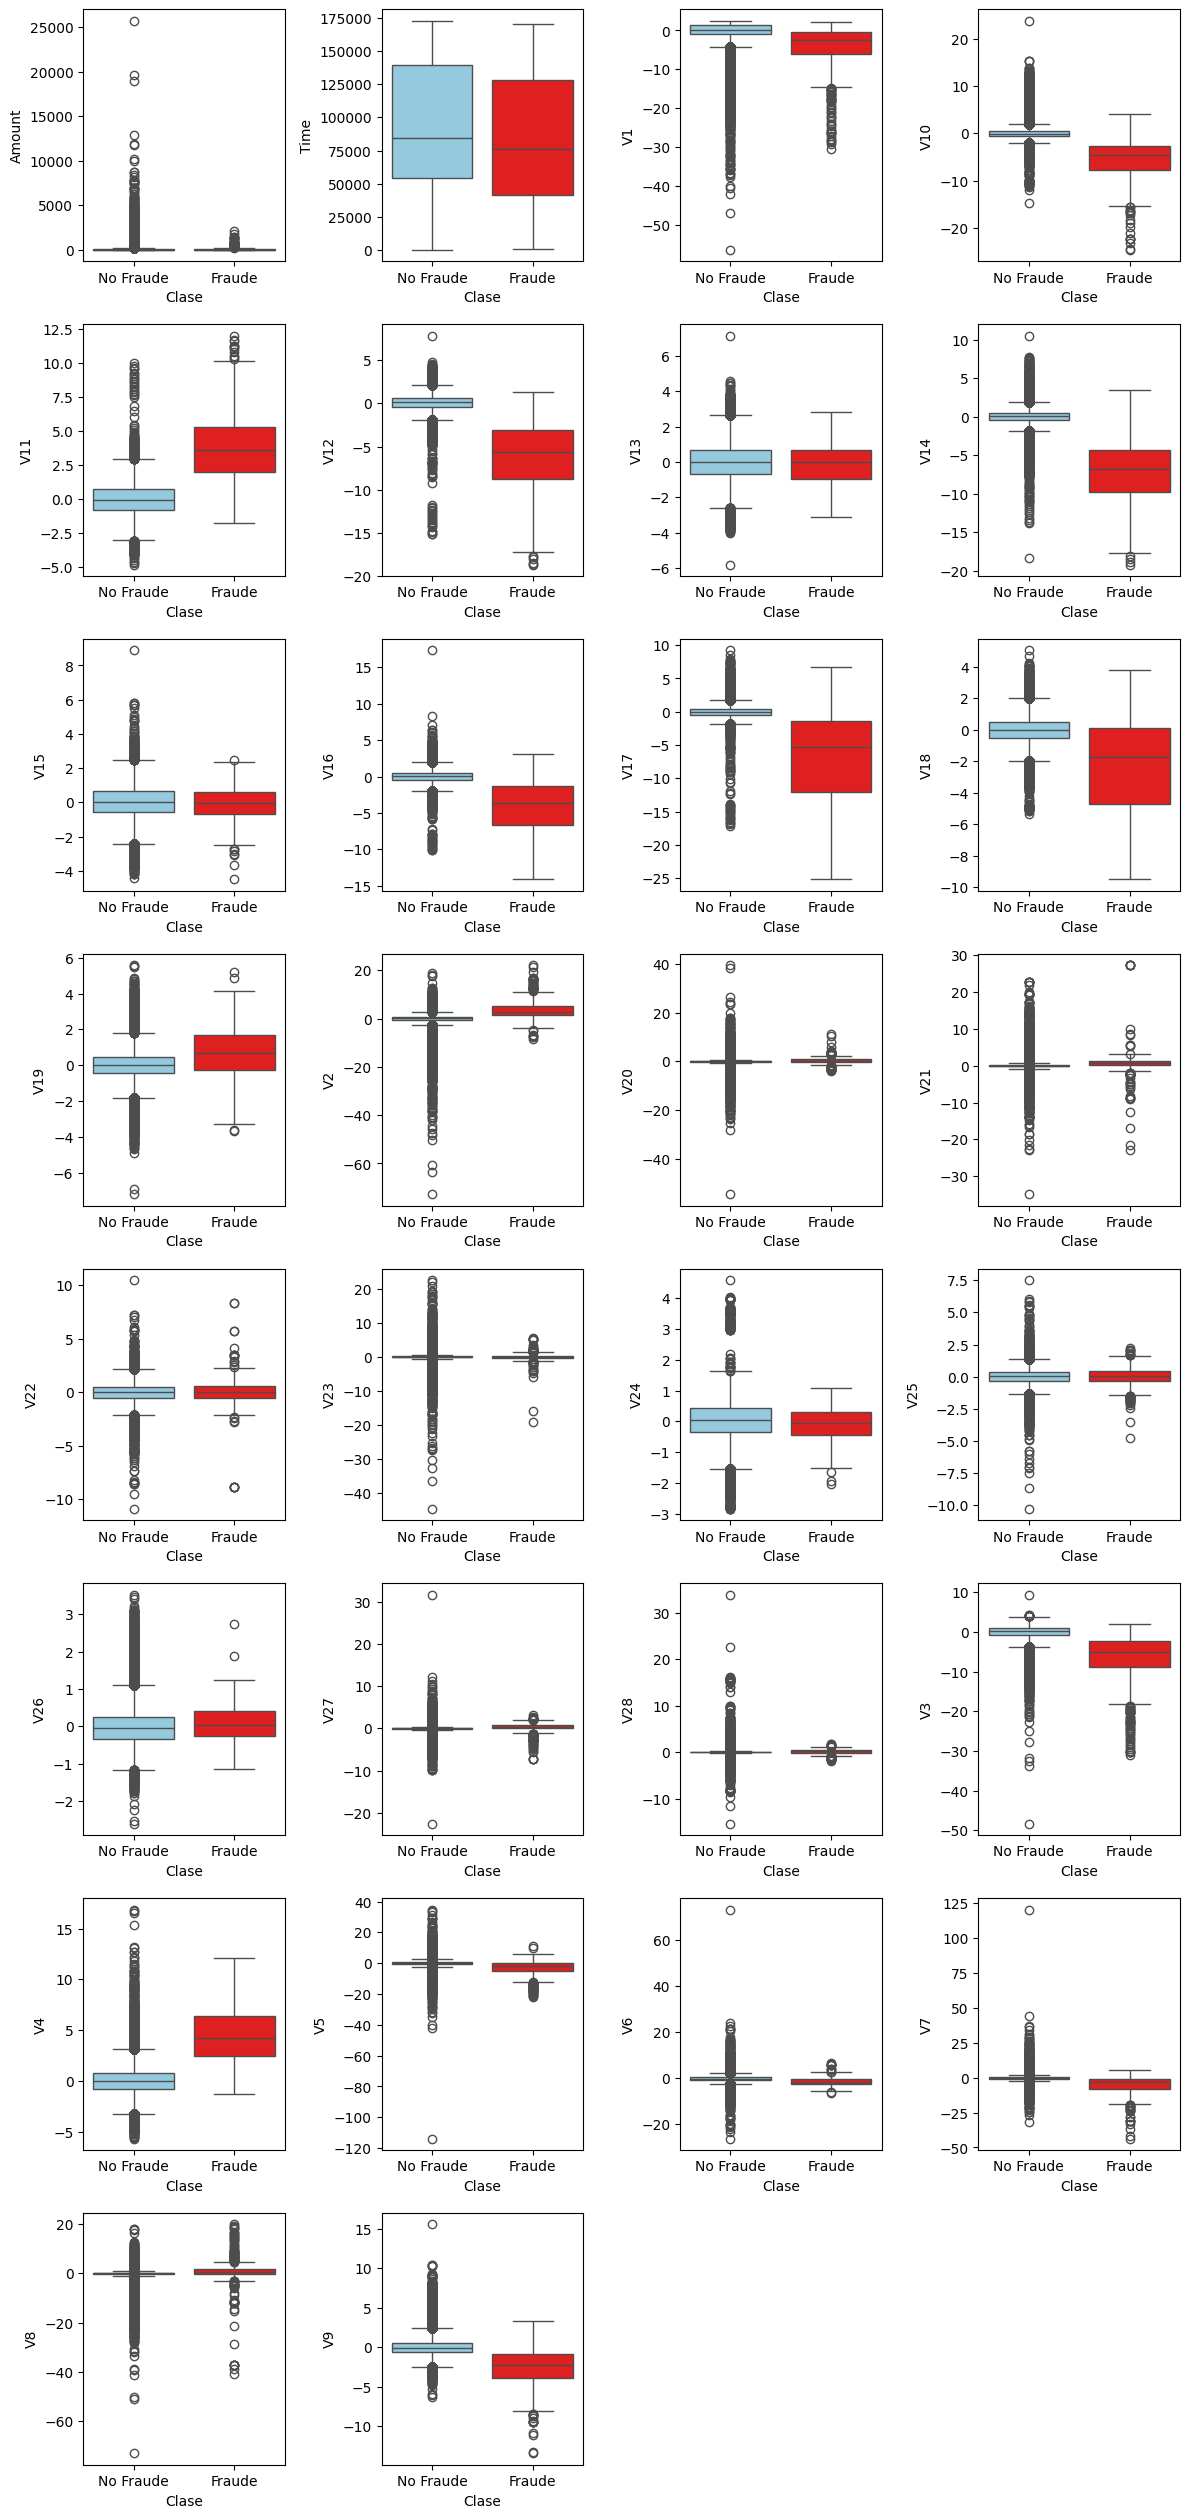

Al analizar la matriz de correlación (Figura 3), no se observaron correlaciones altas entre las variables, lo que sugiere una independencia relativa entre ellas. Esto llevó a no aplicar reducción de dimensionalidad mediante PCA, ya que no existían redundancias significativas que justificaran su uso.

Figura 3. Matriz de correlación de la base de datos.

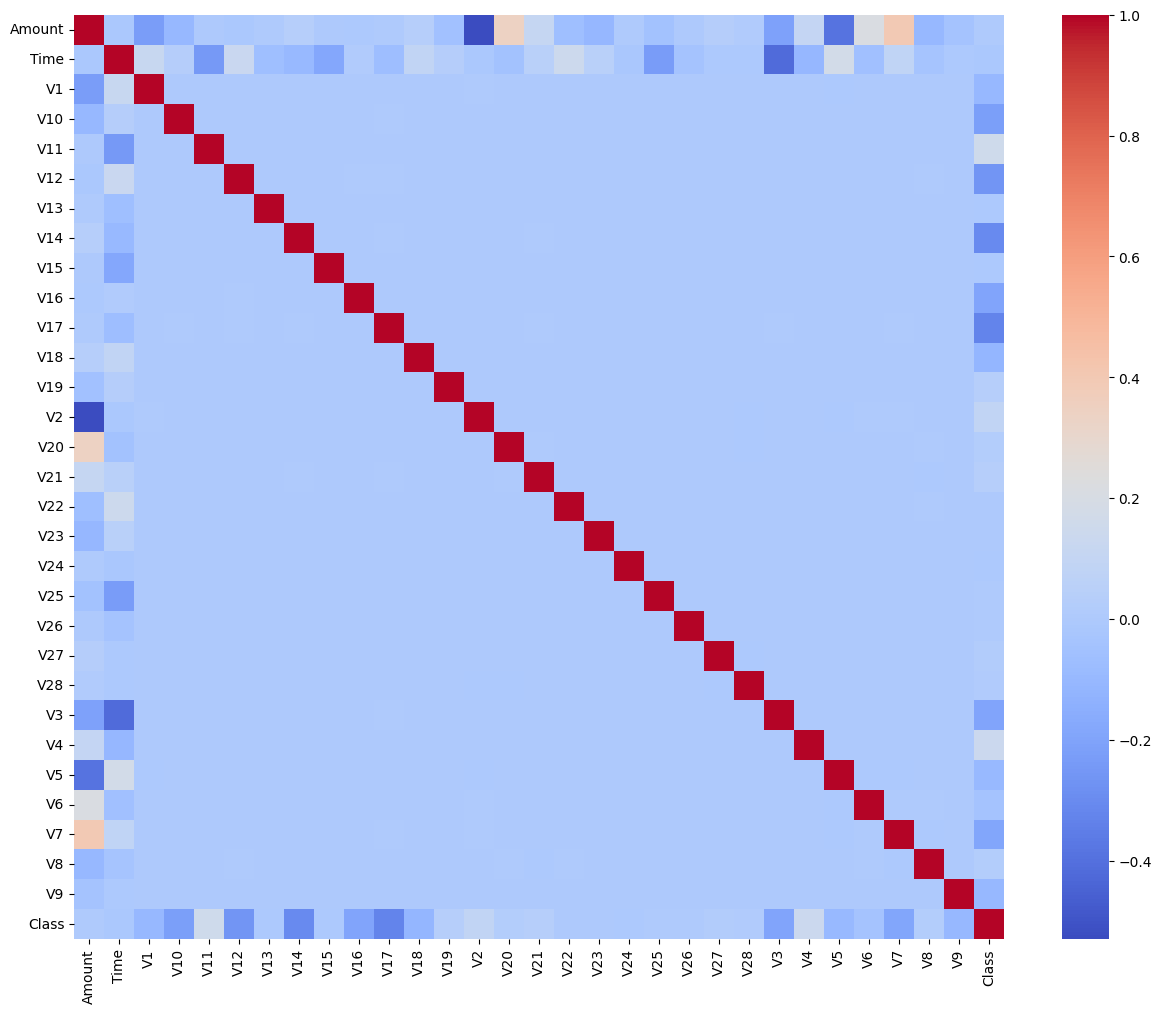

Además, se aplica un análisis bivariado para algunas variables de las que se identificó anteriormente. Se distingue, por ejemplo, que las variables $V17$ vs. $V14$ y $V14$ vs. $V10$ están parcialmente separadas.

Figura 4. Distribución de las variables $V17$ vs. $V14$ y $V14$ vs. $V10$ respecto a las clases.

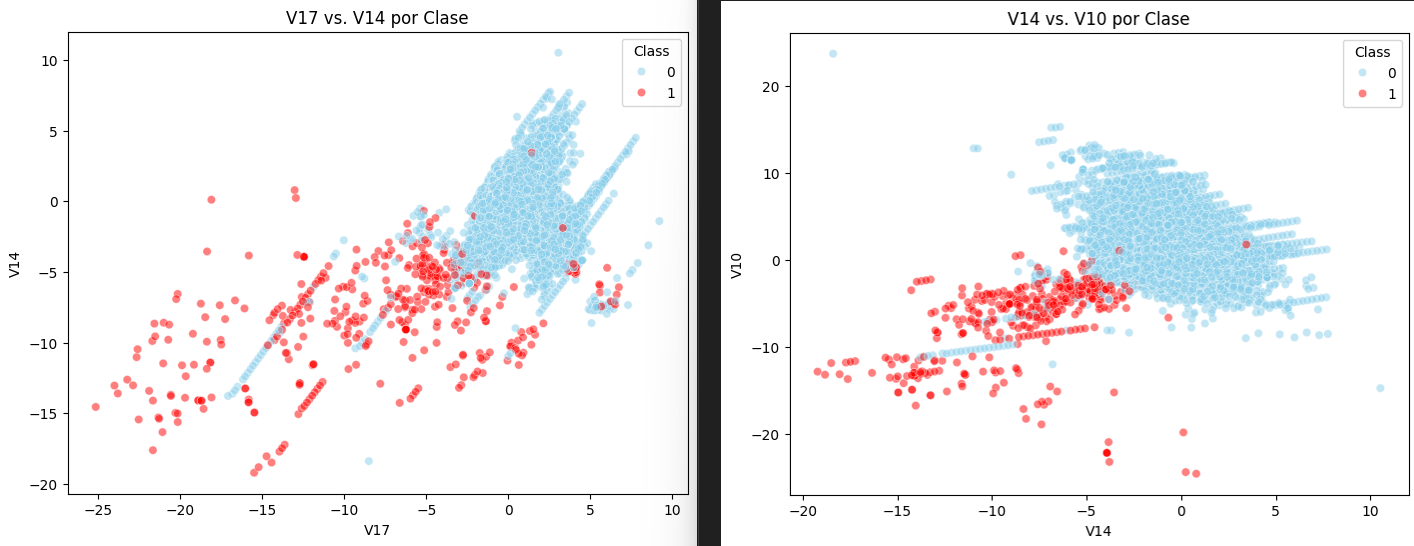

## Selección de Características

A pesar de no existir correlaciones fuertes, se decidió aplicar tres metodologías complementarias para determinar las variables con mayor capacidad predictiva.

Método filtro:
Se utilizó el procedimiento de información mutua para evaluar la dependencia no lineal entre cada variable y la clase objetivo.
Las variables más relevantes fueron V17, V14, V12, V10, V11, V16, V4, V3, V18 y V9.

Método integrado: Se utilizó Random Forest y se obtuvieron resultados consistentes, destacando las variables V14, V10, V12, V17, V11, V4, V3, V16 y V9 como las más influyentes.

Método Wrapper: Se utilizó el método de RFE junto a Logistic Regression, destacando las variables V10, V13, V14, V16, V21, V22, V25, V27 y V4.

En base a la convergencia observada entre los tres métodos, se definió un conjunto final de nueve variables:
V14, V10, V16, V4, V12, V17, V11, V3 y V9, empleadas en la fase de modelación.

## Modelación

Dado el fuerte desbalance en los datos, se optó por no aplicar técnicas de remuestreo (como SMOTE o undersampling) para evitar generar observaciones sintéticas que distorsionaran el patrón original.
En su lugar, se utilizó el parámetro class_weight='balanced' en los algoritmos, lo que ajusta automáticamente la penalización por clase sin alterar la estructura de la base.

Los modelos considerados para el entrenamiento son Logistic Regression, SVM, Decision Tree, Random Forest, XGBoost, LightGBM y Red Neuronal (MLPClassifier).

Se aplicó validación cruzada estratificada y las métricas consideradas fueron AUPRC (principal), Precision, Recall y F1-score, para evaluar el equilibrio entre detección de fraudes y falsos positivos.

Tabla 1. Métricas de desempeño para los distintos modelos seleccionados.

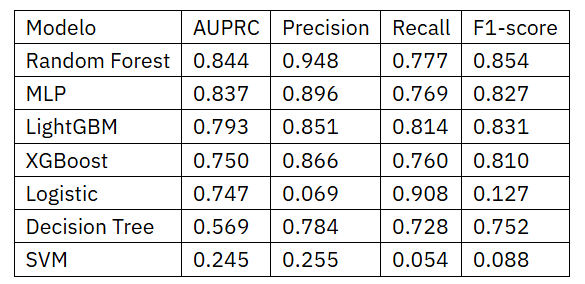

El modelo con mejor desempeño fue Random Forest, alcanzando un AUPRC de 0.84, una precisión de 94.8% y un recall de 77.7%, evidenciando un equilibrio robusto entre detección de fraudes y control de falsos positivos. El modelo fue ajustado empleando class_weight='balanced', lo que permitió compensar el desbalance sin necesidad de remuestreo.

## Predicción sobre datos de prueba

El modelo final fue aplicado al conjunto creditcard_test.csv, generando el archivo creditcard_test_evaluate.csv, que contiene las columnas originales junto con las predicciones:

*   prediction: clasificación binaria (0 = no fraude, 1 = fraude).

*   probability: probabilidad asociada a la clase 1.


Es importante considerar que observaciones con probabilidades cercanas a 0.5 corresponden a casos con alta incertidumbre.
En un entorno real, estas transacciones deberían ser revisadas manualmente o procesadas bajo una política intermedia (por ejemplo, solicitar autenticación adicional).

Tabla 2. Filtro de las transacciones con probabilidades entre 0.10 a 0.90.

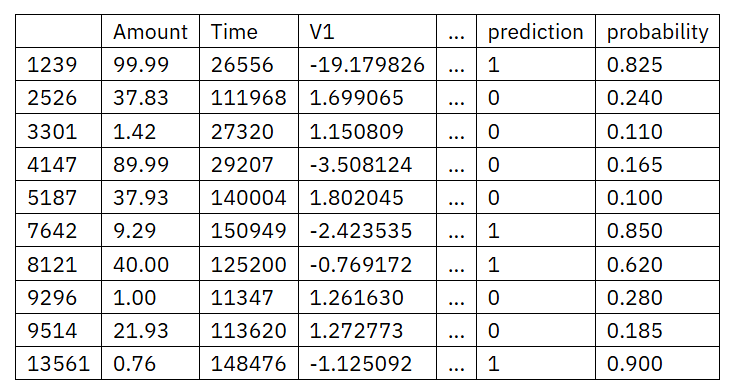

**Respecto a la pregunta: ¿Cuál sería la métrica adecuada con la cual podremos evaluar su modelo?**

Con respecto a la métricas de desempeño para evaluar el modelo, se debe tener cuidado a la hora de hacer la selección, debido a que el conjunto de dato esta desbalanceado, lo que causará métricas sesgadas, por ejemplo, la Accuracy es engañosa es este caso al igual que la curva ROC-AUC por que tienderá a sobreestimar el rendimiento con clases muy desbalanceadas. Es por ello que, usaría AUPRC como métrica principal de comparación entre modelos, ya que refleja bien el trade-off entre precisión y sensibilidad en datos desbalanceados, además de observar la Precision, Recall y F1 para mostrar el equilibrio.

## Conclusiones

El desarrollo del modelo predictivo permitió detectar transacciones potencialmente fraudulentas con un desempeño sólido, pese al alto desbalance de clases.
El proceso incluyó una exploración exhaustiva de datos, tres estrategias de selección de variables y la evaluación de múltiples algoritmos.

El modelo Random Forest se consolidó como la mejor alternativa, combinando alta precisión y recall, sin requerir modificaciones sustanciales de la base ni técnicas de oversampling.
La estrategia class_weight='balanced' demostró ser efectiva para ajustar el aprendizaje a la clase minoritaria.

Es importante señalar que el modelo se puede mejorar. Para ello se sugiere, analizar versiones con menos variables para simplificar la interpretación y reducir sobreajuste, además evaluar el desempeño con la base completa de variables para validar robustez y cnsiderar comparar los resultados al aplicar métodos de remuestreo (como SMOTE-Tomek o NearMiss) evitando introducir patrones anómalos.

En conclusión, el modelo desarrollado constituye una aproximación para la detección temprana de fraudes financieros, contribuyendo a reducir pérdidas económicas y mejorar la experiencia del cliente sin comprometer la precisión operativa del sistema.